In [2]:
#1) import the modules, libraries and packages that you need 
#(numpy, pandas, matplotlib.pyplot, seaborn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#2) read the csv file into a pandas dataframe
#the csv file is under the content area Datasets in BB 
#named californiaHousing.csv
cali = pd.read_csv("housing.csv")

In [21]:
#3) First we want to learn a little about the data
#print out the first 5 rows (head) of the dataframe
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [22]:
#4) print out the mean, median, std, quartiles for all the columns
#hint: use describe (or if you wish to do it another way, that is fine too!)
cali.describe

<bound method NDFrame.describe of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population

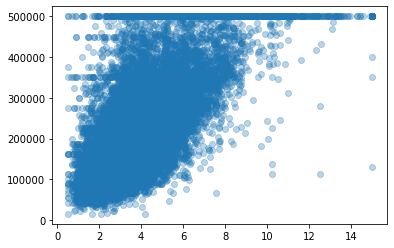

In [23]:
#5) (Notice that there are different scales. 
#Look at the median_house_value and the median_income
#these should really be on the same scale! -- 
#You don't have to do anything about it, now, though!) 
#Use Matplotlib to graph the median_income(x axis) and median_house_value 
#(y axis)
#using a scatter plot. Set alpha 
#(the transparency value to a low value, below it is set to .3)
plt.scatter(cali['median_income'], cali['median_house_value'], alpha=.3)

### EXTRA CREDIT
- Create two new colums that are the scaled or normalized versions of  the median_house_value and the median income columns
- In a markdown cell, describe which method you used and why

(array([  16.,  111.,  750., 1014., 1353., 1245., 1295., 1371., 1433.,
        1501., 1350.,  920., 1089.,  958.,  752.,  730.,  619.,  420.,
         367.,  418.,  454.,  311.,  232.,  209.,  173.,  145.,  161.,
          98.,   87., 1058.]),
 array([ 14999.        ,  31165.73333333,  47332.46666667,  63499.2       ,
         79665.93333333,  95832.66666667, 111999.4       , 128166.13333333,
        144332.86666667, 160499.6       , 176666.33333333, 192833.06666667,
        208999.8       , 225166.53333333, 241333.26666667, 257500.        ,
        273666.73333333, 289833.46666667, 306000.2       , 322166.93333333,
        338333.66666667, 354500.4       , 370667.13333333, 386833.86666667,
        403000.6       , 419167.33333333, 435334.06666667, 451500.8       ,
        467667.53333333, 483834.26666667, 500001.        ]),
 <BarContainer object of 30 artists>)

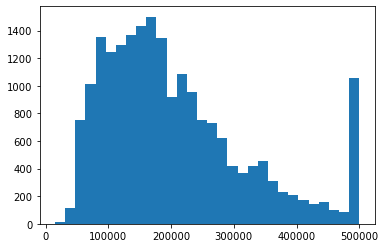

In [7]:
#6)plot the median_house_value as a histogram, use the option bins setting 
#it to at least 30
plt.hist(cali['median_house_value'], bins=30)

In [8]:
#7) Do you see anything interesting from these two plots?
#There is a strange peak at the end of median_house_value. 
#Find that value and print out. 
max_median = np.array(cali['median_house_value'].sort_values())[-1]
max_median

500001.0

#8) Put the answer to this question in a markdown cell. 
#Why might this be the case?

This could simply be an errore

put your answer in this markdown cell here:

In [9]:
#9) 
#how many lines of data have a median_house_value of exactly 500001.00
cali[cali['median_house_value'] == 500001.0].count()[0]

965

In [10]:
#10) check to see the types of all columns in the dataset
cali.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [11]:
#11) are there any missing values?
#print how many missing values there are per column
cali.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
#12) Fill the missing data in total_bedrooms with the median 
#value of that column
cali[cali['total_bedrooms'].isna()] = cali['total_bedrooms'].mean()

In [14]:
#13) Show that there are no more missing values (you can do this 
#in other ways too!)
cali.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [24]:
#14) remove all lines with the  median house value of 500001.0
# cali.drop()
cali[cali['median_house_value'] == 500001.0].count()[0]

965

In [25]:
#15) There is one category feature (all the rest are float)
#what are the possible values of this category?

ocean_proximity_counts = cali['ocean_proximity'].value_counts()
ocean_proximity_counts


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
#16) give a bar plot to see how many of each of this category there are
plt.hist(ocean_proximity_counts)

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

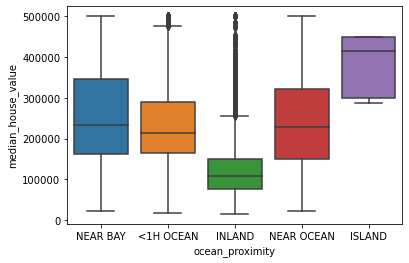

In [26]:
#17)
#let us use seaborn to see how prices are distributed for the different areas
# You can use a boxplot, violin plot, scatter plot, whichever you want!
#17-2.1) E.C. Show a second plot that gives this category distribution
sns.boxplot(y='median_house_value', x='ocean_proximity', data=cali)


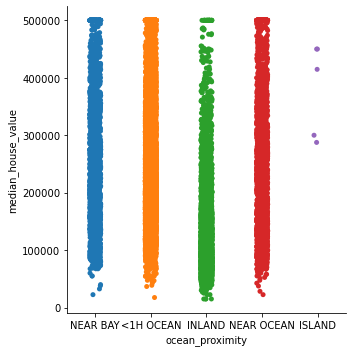

In [37]:
sns.catplot(y='median_house_value',data=cali, x='ocean_proximity')


In [ ]:
#17-2.2) EC is there a difference in price for older houses and 
#younger houses? Do same as above for houses over the median age and 
#under the median age

In [ ]:
#18) Use pairplot to see the correlation between all features. 
#record your observations in a markdown cell!
sns.pairplot(cali)

<AxesSubplot:>

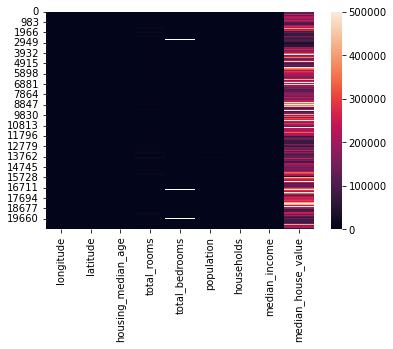

In [46]:
#19) #Show a heat map to determine if  your observations correct

In [ ]:
#20) look at the iris dataset that  we plotted together in class (there were
#four features plotted, one was x axis, one was y axis one was size and
#one was the color
#let us do the same thing here, x axis as longitude, y axis as latitude,  size the population divided by 100 and 
#the color to the median_house_value. Use whatever cmap (colormap) you want!
#You should get a California shaped plot, showing the population, house prices!
